In [1]:
import tensorflow as tf

from tensorflow.compat.v1 import ConfigProto, Session
from tensorflow.compat.v1.keras.backend import set_session
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction =0.3 #GPU 메모리 사용을 30%로 제한
session = Session(config=config)
set_session(session)

from tensorflow.python.client import device_lib
device_lib.list_local_devices()
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



(50000, 32, 32, 3) (50000, 1)
label :  [19]


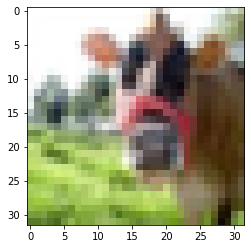

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar100.load_data()
print(X_train.shape, Y_train.shape)

print('label : ',Y_train[0])
plt.imshow(X_train[0])

In [3]:
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

(50000, 32, 32, 3) (50000, 100)


In [4]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(input_shape=(32,32,3), include_top=False)
# model = ResNet50(weights='imagenet', input_shape=(32,32,3), include_top=False)

model.summary()

# img_path = 'elephant.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# preds = model.predict(x)
# # decode the results into a list of tuples (class, description, probability)
# # (one such list for each sample in the batch)
# print('Predicted:', decode_predictions(preds, top=3)[0])
# # Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
# base_model = ResNet152V2(weights='imagenet', input_shape=(32,32,3), include_top=False)
# # base_model = VGG16(weights=None, input_shape=(32,32,3), include_top=False)
# base_model.summary()

In [7]:
x = model.output
x = Flatten()(x)
# let's add a fully-connected layer
x = Dense(256, activation='relu')(x)
# and a logistic layer -- let's say we have 10 classes
predictions = Dense(Y_train.shape[1], activation='softmax')(x)

In [8]:
# this is the model we will train
model = Model(inputs=model.input, outputs=predictions)

In [9]:
# # first: train only the top layers (which were randomly initialized)
# for layer in model.layers:
#     layer.trainable = False
    
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

conv5_block3_1_bn (BatchNormali (None, 1, 1, 512)    2048        conv5_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_1_relu (Activation (None, 1, 1, 512)    0           conv5_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block3_2_conv (Conv2D)    (None, 1, 1, 512)    2359808     conv5_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block3_2_bn (BatchNormali (None, 1, 1, 512)    2048        conv5_block3_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_2_relu (Activation (None, 1, 1, 512)    0           conv5_block3_2_bn[0][0]          
__________________________________________________________________________________________________
conv5_bloc

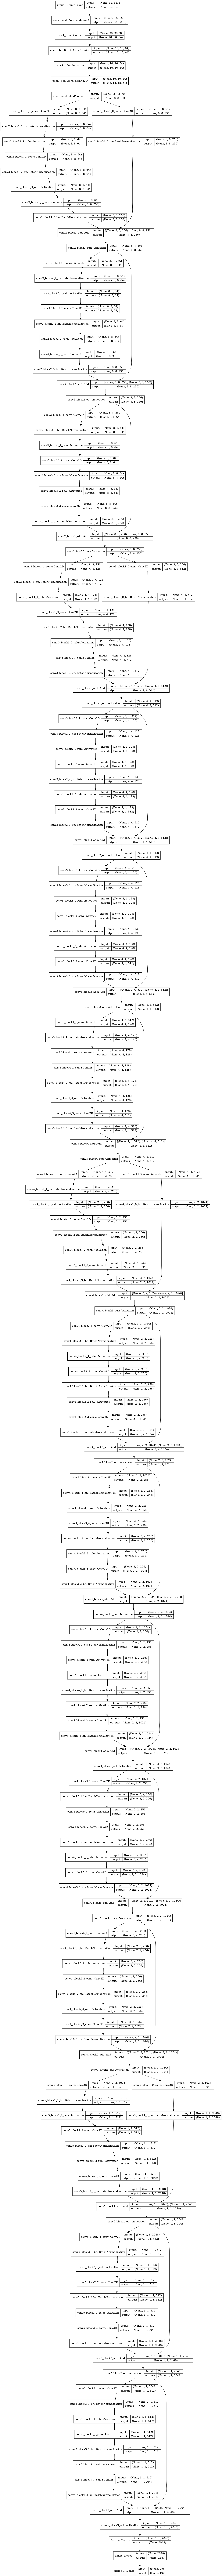

In [10]:
from tensorflow.keras.utils import plot_model
%matplotlib inline

plot_model(model, show_shapes=True)

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=1e-6, epsilon=None, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [17]:
earlystopper = EarlyStopping(monitor='val_accuracy', patience=30, verbose=0, mode='auto')
history = model.fit(X_train, Y_train, batch_size=64, epochs=500, validation_split=0.2, callbacks = [earlystopper])

Epoch 1/500
625/625 [==============================] - 34s 48ms/step - loss: 0.1785 - accuracy: 0.9492 - val_loss: 9.6816 - val_accuracy: 0.4514
Epoch 2/500
625/625 [==============================] - 28s 45ms/step - loss: 0.1409 - accuracy: 0.9629 - val_loss: 10.6492 - val_accuracy: 0.4552
Epoch 3/500
625/625 [==============================] - 29s 46ms/step - loss: 0.1233 - accuracy: 0.9680 - val_loss: 11.3460 - val_accuracy: 0.4571
Epoch 4/500
625/625 [==============================] - 28s 44ms/step - loss: 0.1126 - accuracy: 0.9720 - val_loss: 12.4829 - val_accuracy: 0.4607
Epoch 5/500
625/625 [==============================] - 28s 45ms/step - loss: 0.1171 - accuracy: 0.9701 - val_loss: 14.3042 - val_accuracy: 0.4571
Epoch 6/500
625/625 [==============================] - 27s 44ms/step - loss: 0.1029 - accuracy: 0.9746 - val_loss: 15.2421 - val_accuracy: 0.4574
Epoch 7/500
625/625 [==============================] - 29s 46ms/step - loss: 0.1000 - accuracy: 0.9758 - val_loss: 11.6120 - 

625/625 [==============================] - 45s 72ms/step - loss: 0.0657 - accuracy: 0.9837 - val_loss: 17.2196 - val_accuracy: 0.4621
Epoch 57/500
625/625 [==============================] - 45s 73ms/step - loss: 0.0650 - accuracy: 0.9842 - val_loss: 17.7468 - val_accuracy: 0.4621
Epoch 58/500
625/625 [==============================] - 45s 72ms/step - loss: 0.0705 - accuracy: 0.9823 - val_loss: 20.2422 - val_accuracy: 0.4596
Epoch 59/500
625/625 [==============================] - 46s 73ms/step - loss: 0.0645 - accuracy: 0.9833 - val_loss: 19.5356 - val_accuracy: 0.4595


In [18]:
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 2s 27ms/step - loss: 20.1695 - accuracy: 0.4581
loss : 20.1695, accruracy : 0.4581
